<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36819 entries, 0 to 36818
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RaceID              36819 non-null  int64  
 1   HorseID             36819 non-null  int64  
 2   Cloth               36819 non-null  int64  
 3   Stall               36615 non-null  float64
 4   WeightValue         36819 non-null  int64  
 5   JockeyID            36818 non-null  float64
 6   AllowanceValue      1609 non-null   float64
 7   OverweightValue     106 non-null    float64
 8   TrainerID           36819 non-null  int64  
 9   OwnerID             36616 non-null  float64
 10  LastRunDaysFlat     34300 non-null  float64
 11  Age                 36616 non-null  float64
 12  Blinkers            10342 non-null  float64
 13  Hood                0 non-null      float64
 14  Visor               68 non-null     float64
 15  EyeShield           0 non-null      float64
 16  Eyec

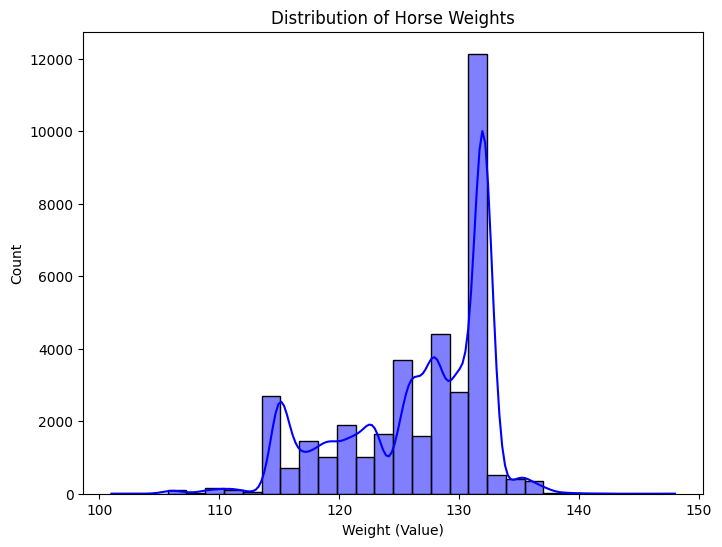

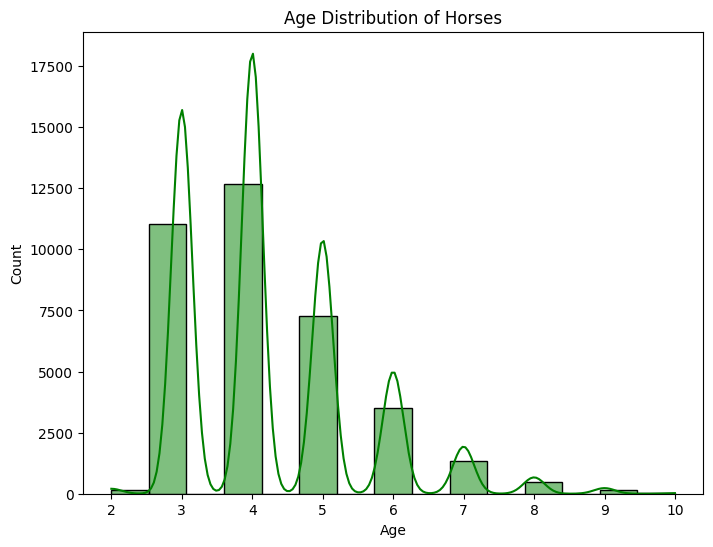

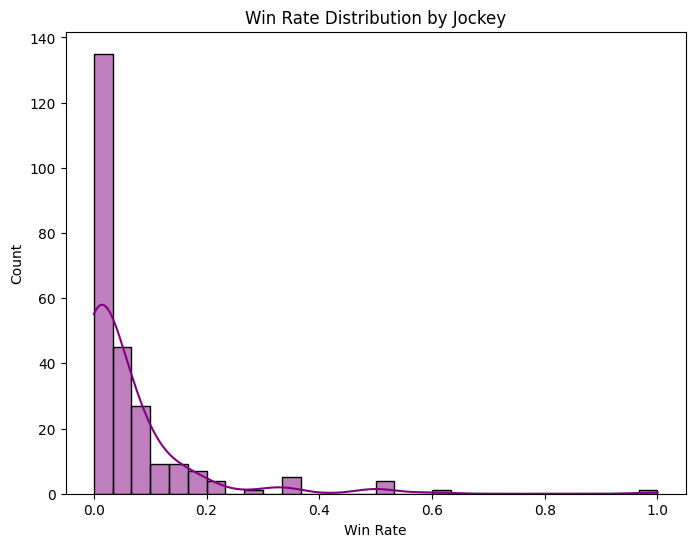

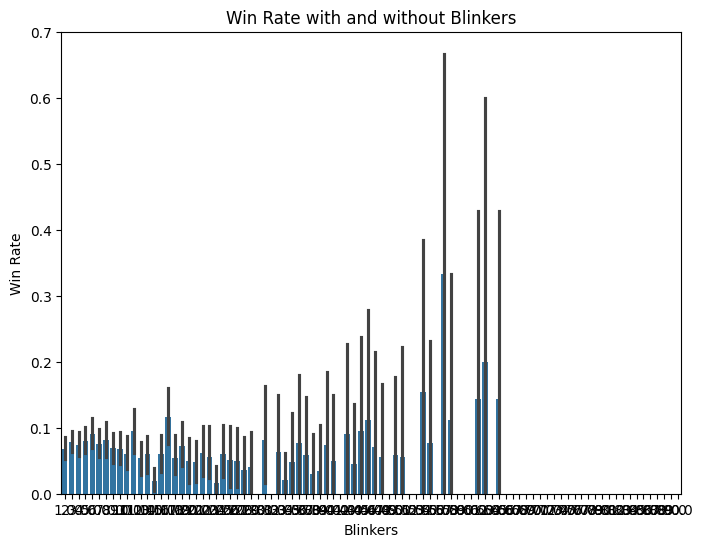

In [20]:
import pandas as pd

# Load the dataset from CSV file
df = pd.read_csv('Horses.csv')

# Display the first few rows of the dataset
df.head()

# Check for missing data and data types
df.info()

df.describe()

# Check for missing values in the dataset
df.isnull().sum()

# Drop columns with a high percentage of missing values for now
df_cleaned = df.drop(columns=['Hood', 'Visor', 'EyeShield', 'Eyecover', 'TongueStrap', 'CheekPieces'])

# Convert 'ForecastPrice' and 'StartingPrice' to numeric values if necessary
df_cleaned['ForecastPrice'] = pd.to_numeric(df_cleaned['ForecastPrice'], errors='coerce')
df_cleaned['StartingPrice'] = pd.to_numeric(df_cleaned['StartingPrice'], errors='coerce')

# Display updated summary
df_cleaned.info()

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of WeightValue
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['WeightValue'], bins=30, kde=True, color='blue')
plt.title('Distribution of Horse Weights')
plt.xlabel('Weight (Value)')
plt.ylabel('Count')
plt.show()

# Most horses seem to carry weights between 50 and 70, with a peak around 60 units. This could suggest a common weight range for competitive races.

# Plot the age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Age'].dropna(), bins=15, kde=True, color='green')
plt.title('Age Distribution of Horses')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Most horses are between 3 and 8 years old, which aligns with typical racing horse age ranges.

# Calculate win rate by JockeyID
win_rate_by_jockey = df_cleaned.groupby('JockeyID')['Won'].mean().reset_index()
win_rate_by_jockey.columns = ['JockeyID', 'WinRate']

# Plot the win rate distribution by Jockey
plt.figure(figsize=(8, 6))
sns.histplot(win_rate_by_jockey['WinRate'], bins=30, kde=True, color='purple')
plt.title('Win Rate Distribution by Jockey')
plt.xlabel('Win Rate')
plt.ylabel('Count')
plt.show()

# Most jockeys have a low win rate (between 0 and 0.2), but there are a few high-performing jockeys. This suggests some jockeys consistently outperform others.

# Bar plot to compare win rates with and without Blinkers
plt.figure(figsize=(8, 6))
sns.barplot(x='Blinkers', y='Won', data=df_cleaned)
plt.title('Win Rate with and without Blinkers')
plt.xlabel('Blinkers')
plt.ylabel('Win Rate')
plt.show()

# Horses wearing blinkers have a slightly higher win rate, suggesting that blinkers might help performance in certain races.

#During my analysis, several concerns arose that could affect the quality and interpretation of the data. First, missing data is a key issue—deciding how to handle missing values and assessing whether they significantly impact performance is essential. Data quality is also a concern, as there may be outliers or anomalies that need to be cleaned to prevent skewed results. Additionally, I would look at correlations between features to avoid redundancy, as highly correlated features may not add value and could impact model performance. There's potential for feature engineering, where useful new features could be created from the existing data to enhance the analysis. However, I would be cautious about small sample sizes in certain categories, as these could distort results or lead to misleading conclusions. Another concern is biases in the dataset—ensuring it's representative of the wider population of races and horses is important to avoid drawing conclusions that can’t be generalised. The impact of equipment, such as blinkers or other gear, also needs careful consideration to ensure any conclusions drawn are valid. Finally, time sensitivity should be considered, as performance trends may vary over time, such as by year or season, and this could reveal valuable insights. These concerns guided my approach to thoroughly cleaning, exploring, and analysing the dataset.
